# Tasks

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re

# Task 1

1. Начнем с простого и вспомним, как применять логистическую регрессию в R. Напишите функцию get_coefficients, которая получает на вход dataframe с двумя переменными *x* ( фактор с произвольным числом градаций) и *y* ( фактор с двумя градациями). Функция строит логистическую модель, где *y* — зависимая переменная, а *x* — независимая, и возвращает вектор со значением экспоненты коэффициентов модели. 

In [17]:
df = pd.read_csv("https://stepik.org/media/attachments/course/524/test_data_01.csv", dtype="category")

In [18]:
df.head()

,x,y
0,1,1
1,3,1
2,1,1
3,1,2
4,2,2


In [19]:
df.dtypes

x    category
y    category
dtype: object

In [20]:
df.x.unique()

[1, 3, 2]
Categories (3, object): [1, 3, 2]

In [21]:
df.y.unique()

[1, 2]
Categories (2, object): [1, 2]

In [26]:
model = smf.glm(formula='y ~ x', data=df, family=sm.families.Binomial()).fit()
model.params

Intercept    0.105361
x[T.2]      -0.932039
x[T.3]       0.405465
dtype: float64

In [28]:
np.exp(-model.params)

Intercept    0.900000
x[T.2]       2.539683
x[T.3]       0.666667
dtype: float64

In [23]:
def get_coefficients(data: pd.DataFrame) -> list:
    """Function for performing coefficients of linear regression.
    
    Parameters
    ----------
    dataset: pd.DataFrame
        Input pd.DataFrame with some categorial data.
         
    Returns
    -------
        Returns a list with the exponent value of the model coefficients.
    """

    return np.exp(-smf.glm("y ~ x", data = data, family=sm.families.Binomial()).fit().params)

In [24]:
get_coefficients(df)

Intercept    0.900000
x[T.2]       2.539683
x[T.3]       0.666667
dtype: float64

# Task 2

2. Если в нашей модели есть количественные предикторы, то в интерцепте мы будем иметь значение, соответствующее базовому уровню категориальных предикторов и нулевому уровню количественных. Это не всегда осмысленно. Например, нам не интересен прогноз для людей нулевого возраста или роста. В таких ситуациях количественную переменную имеет смысл предварительно центрировать так, чтобы ноль являлся средним значением переменной. Самый простой способ центрировать переменную — отнять от каждого наблюдения среднее значение всех наблюдений.

xcentered_i = x_i - x_mean 

В этом задании вашей задачей будет  написать функцию centered, которая получает на вход датафрейм и имена переменных, которые необходимо центрировать так, как это описано выше. Функция должна возвращать этот же датафрейм, только с центрированными указанными переменными.

In [58]:
df = pd.read_csv("https://stepic.org/media/attachments/course/524/cen_data.csv")

In [59]:
df

,X1,X2,X3,X4
0,8.5,9.7,10.7,10.3
1,8.1,12.8,9.7,12.6
2,9.6,7.4,8.4,12.7
3,9.6,10.9,7.7,8.0
4,11.9,13.7,12.3,11.0


In [56]:
names = ["X4", "X2", "X1"]
for name in names:
    col_mean = df[name].mean()
    df["cntrd_{}".format(name)] = df[name] - col_mean
df

,X1,X2,X3,X4,cntrd_X4,cntrd_X2,cntrd_X1
0,8.5,9.7,10.7,10.3,-0.62,-1.2,-1.04
1,8.1,12.8,9.7,12.6,1.68,1.9,-1.44
2,9.6,7.4,8.4,12.7,1.78,-3.5,0.06
3,9.6,10.9,7.7,8.0,-2.92,0.0,0.06
4,11.9,13.7,12.3,11.0,0.08,2.8,2.36


In [57]:
cntrd_cols = [col for col in df.columns if "cntrd" in col]
df[cntrd_cols]

,cntrd_X4,cntrd_X2,cntrd_X1
0,-0.62,-1.2,-1.04
1,1.68,1.9,-1.44
2,1.78,-3.5,0.06
3,-2.92,0.0,0.06
4,0.08,2.8,2.36


In [60]:
def centered(data, var_names):
    for name in var_names:
        col_mean = data[name].mean()
        df[name] = df[name] - col_mean
    return df

In [61]:
names = ["X4", "X2", "X1"]
centered(df, names)

,X1,X2,X3,X4
0,-1.04,-1.2,10.7,-0.62
1,-1.44,1.9,9.7,1.68
2,0.06,-3.5,8.4,1.78
3,0.06,0.0,7.7,-2.92
4,2.36,2.8,12.3,0.08


# Task 3

3. Представьте, что мы работаем в аэропорту в службе безопасности и сканируем багаж пассажиров. В нашем распоряжении есть информация о результатах проверки багажа за предыдущие месяцы. Про каждую вещь мы знаем:

являлся ли багаж запрещенным - is_prohibited (No - разрешенный, Yes - запрещенный)  
его массу (кг) - weight  
длину (см) - length  
ширину (см) - width  
тип багажа (сумка или чемодан) - type.

Напишите функцию *get_features*, которая получает на вход набор данных о багаже. Строит логистическую регрессию, где зависимая переменная - являлся ли багаж запрещенным, а предикторы - остальные переменные, и возвращает вектор с названиями статистически значимых переменных (p < 0.05) (в модели без взаимодействия). Если в данных нет значимых предикторов, функция возвращает строку с сообщением  *"Prediction makes no sense"*.

In [107]:
df = pd.read_csv("https://stepic.org/media/attachments/course/524/test_luggage_1.csv")

In [87]:
df.head()

,is_prohibited,weight,length,width,type
0,No,69,53,17,Suitcase
1,No,79,52,21,Bag
2,No,82,54,20,Suitcase
3,No,81,50,23,Bag
4,No,84,48,19,Suitcase


In [110]:
def get_features(data):
    # Let's change the dependent variable to 1/0
    data.loc[df["is_prohibited"]=="Yes", "is_prohibited"] = 1
    data.loc[df["is_prohibited"]=="No", "is_prohibited"] = 0
    # Change type of nominative columns from object to categorical
    df.is_prohibited = df.is_prohibited.astype('category')
    df.type = df.type.astype('category')
    # Build our model
    model = smf.glm(formula='is_prohibited ~ weight+length+width+type', data=df, family=sm.families.Binomial()).fit()
    summary = model.summary()
    coef_names = np.array([str(model.summary().tables[1][i][0]) for i in range(1, 6)])
    p_values = np.array([float(str(model.summary().tables[1][i][4])) for i in range(1, 6)])
    # Выбираем только те имена коэфициентов, для которых p_values < 0.05
    res_1 = coef_names[p_values < 0.05]
    # Для номинативных зависимых переменных название коэфициентов будет отличаться от изначального
    # Например, 'C(type)[T.Suitcase]' вместо 'type'. Поэтому мы приводим их в изначальный вид
    result = [re.findall(name, r) for r in res1 for name in ['weight', 'length', 'width', 'type']]
    result = list(np.array([r for r in result if r]).ravel())
    # Если в массив результатов не пустой, возвращаем его, иначе - текст
    return result if len(result) else 'Prediction makes no sense'

In [111]:
get_features(df)

'Prediction makes no sense'

# Task 4

4. Продолжим нашу работу в службе безопасности! Разобравшись с тем, какие предикторы могут помогать нам предсказывать запрещенный багаж, давайте применим наши знания для повышения безопасности в аэропорту. Обучим наш алгоритм различать запрещенный и разрешенный багаж на уже имеющихся данных и применим его для сканирования нового багажа!

Напишите функцию, которая принимает на вход два набора данных. Первый dataframe, как и в предыдущей задаче, содержит информацию об уже осмотренном багаже (запрещенный или нет, вес, длина, ширина, тип сумки). 

Второй набор данных — это информация о новом багаже, который сканируется прямо сейчас. В данных также есть информация:  вес, длина, ширина, тип сумки и имя пассажира (смотри описание переменных в примере). 

Используя первый набор данных, обучите регрессионную модель различать запрещенный и разрешенный багаж. При помощи полученной модели для каждого наблюдения в новых данных предскажите вероятность того, что багаж является запрещенным. Пассажиров, чей багаж получил максимальное значение вероятности, мы попросим пройти дополнительную проверку. 

Итого, ваша функция принимает два набора данных и возвращает имя пассажира с наиболее подозрительным багажом. Если несколько пассажиров получили максимальное значение вероятности, то верните вектор с несколькими именами. 

В этой задаче для предсказания будем использовать все предикторы, даже если некоторые из них оказались незначимыми. Для предсказания стройте модель без взаимодействия предикторов.

In [128]:
test_df = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data_passangers.csv")

In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   is_prohibited  30 non-null     object
 1   weight         30 non-null     int64 
 2   length         30 non-null     int64 
 3   width          30 non-null     int64 
 4   type           30 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [129]:
predict_df = pd.read_csv("https://stepic.org/media/attachments/course/524/predict_passangers.csv")

In [124]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weight      10 non-null     int64 
 1   length      10 non-null     int64 
 2   width       10 non-null     int64 
 3   type        10 non-null     object
 4   passangers  10 non-null     object
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


In [179]:
def most_suspicious(test, predict):
    # logistic regression model
    model = smf.glm("is_prohibited ~ weight+length+width+type", data=test, family=sm.families.Binomial()).fit()
    
    X = ["weight", "length", "width", "type"]
    pred = model.predict(predict_df[X])
    
    predict['is_Suitcase'] = predict['type'].map({'Suitcase' : 1, 'Bag' : 0})
    
    logit = (model.params["Intercept"] + model.params["type[T.Suitcase]"]*predict['is_Suitcase'] 
         + model.params["weight"]*predict['weight'] + model.params["length"]*predict['length'] 
         + model.params["width"]*predict['width'])
    # Вероятность p = exp(logit) / (1 + exp(logit))
    predict["probability"] = np.exp(logit) / (1 + np.exp(logit))
    predict["is_prohibited_predicted"] = pred
    
    return list(predict.query("probability == probability.max()").passangers.values)

In [180]:
most_suspicious(test_df, predict_df)

['Vsevolod']

# Task 5

5. Напишите функцию *normality_test*, которая получает на вход dataframe с произвольным количеством переменных разных типов (количественные, строки, факторы) и проверяет нормальность распределения количественных переменных. Функция должна возвращать вектор значений p-уровней значимости теста *shapiro.test* для каждой количественной переменной.

In [3]:
from scipy.stats import shapiro

In [30]:
def norm_test(df):
    # get only numerical values
    df_n = df.select_dtypes(include=np.number)
    # apply shapiro test and get p-values
    df_s = df_n.apply(shapiro, axis=0).map(lambda x: round(x[1],3))
    return df_s

In [27]:
df = pd.read_csv("https://stepic.org/media/attachments/course/524/test.csv")

In [28]:
df

,V1,V2,V3,V4,V5,V6
0,10.03,s,9.35,s,9.91,11.23
1,12.45,x,11.61,x,10.07,6.41
2,9.97,a,7.02,a,8.85,11.38
3,10.53,f,12.24,f,7.22,8.71
4,6.59,b,7.72,b,14.31,10.08
5,7.26,j,12.19,j,10.75,11.71
6,6.97,g,7.80,g,9.91,6.99
7,11.99,o,10.98,o,6.04,11.38
8,9.39,k,9.86,k,9.94,11.14
9,13.58,z,11.12,z,6.58,11.58


In [31]:
norm_test(df)

V1    0.568
V3    0.246
V5    0.314
V6    0.009
dtype: float64

# Task 6

6. Напишите функцию *smart_anova*, которая получает на вход dataframe с двумя переменными x и y. Переменная x — это количественная переменная, переменная y - фактор, разбивает наблюдения на три группы.

Если распределения во всех группах значимо не отличаются от нормального, а дисперсии в группах гомогенны, функция должна сравнить три группы при помощи дисперсионного анализа и вернуть именованный вектор со значением p-value, имя элемента — "ANOVA".

Если хотя бы в одной группе распределение значимо отличается от нормального или дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса и возвращает именованный вектор со значением p-value, имя вектора  — "KW".

Распределение будем считать значимо отклонившимся от нормального, если в тесте *shapiro.test()* p < 0.05.

Дисперсии будем считать не гомогенными, если в тесте *bartlett.test()* p < 0.05.

In [2]:
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

In [3]:
# тест на нормальность
def norm_test(df):
    df_s = np.apply_along_axis(shapiro, 0, df)[1]
    return df_s

# тест на гомогенность
def homog_test(df):
    ps = bartlett(*df.T)
    return round(ps[1], 3)

# дисперсионный анализ (ANOVA) для нормально распределенных данных
def anova_test(df):
    ps = f_oneway(*df.T)
    return round(ps[1], 3)

# тест Краскела-Уоллиса для данных, которые не распределены нормально или дисперсии негомогены
def kruskal_test(df):
    ps = kruskal(*df.T)
    return round(ps[1], 3)

# 
def smart_anova(df, need_pivot=True):
    # Pivoting
    if need_pivot:
        df["count"] = df.groupby('y').cumcount()
        df = np.array(df.pivot(values="x", columns="y", index="count"))
    else:
        df = np.array(df)
    if ((norm_test(df) < 0.05).any()) or (homog_test(df) < 0.05):
        print("non-parametric")
        return {"KW": kruskal_test(df)}
    print("parametric")
    return {"ANOVA": anova_test(df)}

In [4]:
df = pd.read_csv("https://stepic.org/media/attachments/course/524/s_anova_test.csv")

In [5]:
df.head()

,x,y
0,1.08,A
1,0.07,A
2,-1.02,A
3,-0.45,A
4,0.81,A


In [6]:
smart_anova(df)

parametric


{'ANOVA': 0.265}

# Task 7

Напишите функцию *normality_by*, которая принимает на вход dataframe c тремя переменными. Первая переменная количественная, вторая и третья имеют две градации и разбивают наши наблюдения на группы. Функция должна проверять распределение на нормальность в каждой получившейся группе и возвращать dataframe с результатами применения теста *shapiro.test*.

Итого: функция должна возвращать dataframe размером 4 на 3.  
Название столбцов:  
1 — имя первой группирующей переменной  
2 — имя второй группирующей переменной  
3 — p_value

In [24]:
df = pd.read_csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       40 non-null     float64
 1   y       40 non-null     int64  
 2   z       40 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [11]:
df.head()

,x,y,z
0,10.9,1,2
1,14.0,1,2
2,8.1,0,2
3,11.0,1,3
4,9.5,1,3


In [32]:
def normality_by(data):
    res = data.groupby(['y', 'z'], as_index=False).agg(lambda x: shapiro(x)[1]).rename(columns={'x':'p_value'})
    return res

In [33]:
normality_by(df)

,y,z,p_value
0,0,2,0.219766
1,0,3,0.623818
2,1,2,0.196036
3,1,3,0.047823


# Task 8

Визуализируйте распределение переменной Sepal.Length в трех группах в данных Iris.

In [59]:
from sklearn import datasets
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [39]:
iris = datasets.load_iris()
# iris

In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'])
iris_df['target'] = iris.target
iris_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Users\Dubreee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Dubreee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Dubreee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

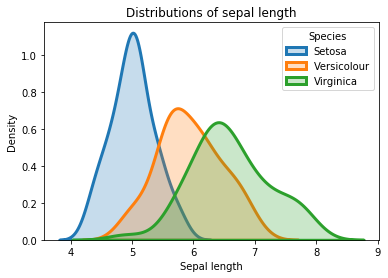

In [67]:
labels = ["Setosa", "Versicolour", "Virginica"]
for i in range(3):
    sns.distplot(iris_df['sepal_length_cm'][iris_df['target']==i], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label=labels[i])
plt.xlabel("Sepal length")
plt.ylabel("Density")
plt.title("Distributions of sepal length")
plt.legend(title="Species")

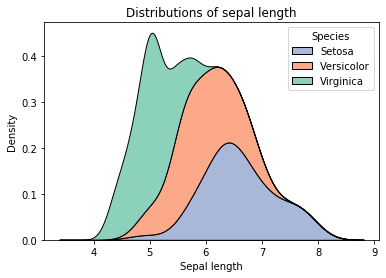

In [81]:
sns.kdeplot(data=iris_df, x="sepal_length_cm", multiple="stack", hue='target', palette="Set2")
plt.xlabel("Sepal length")
plt.ylabel("Density")
plt.title("Distributions of sepal length")
plt.legend(title='Species', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()